# PROJECT NAME : Predicting CO2 Emissions from Fuel Consumption Data using Machine Learning

### Project Type

#### Regression analysis with machine learning techniques is the focus of this study. By utilizing regression analysis, one or more independent factors, such as engine size, cylinder count, and fuel consumption metrics, may be utilized to predict a continuous dependent variable, in this instance CO2 emissions.

## project summary

#### *  Using engine size, cylinder count, and fuel consumption indicators (city, highway, and combined), this research aims to create a machine learning model that can forecast CO2 emissions from automobiles. For the purpose of environmental monitoring, regulatory compliance, and educating customers about the environmental effects of the vehicles they choose, precise estimates of CO2 emissions are essential.


#### * UNDERSTANDING GIVEN DATASET : the dataset provides model specific fuel consumption ratings and estimated carbon di oxide emission for new light duty vehicals for retail sale in canada for year 2019

#### Understanding the dataset : 
#### * The dataset used in this project is the "Fuel Consumption 2019" dataset, which contains information about various vehicle attributes and their corresponding CO2 emissions. This dataset includes features such as engine size, number of cylinders, and fuel consumption in different driving conditions.
#### * the dataset provides model specific fuel consumption ratings and estimated carbon di oxide emission for new light duty vehicals for retail sale in canada for year 2019

#### Objective : 
#### * To explore and preprocess the dataset.
#### * To build multiple regression models for predicting CO2 emissions.
#### * To evaluate the performance of each model using the R2-score.
#### * To identify the best-performing model for accurate predictions

#### Models used :
#### * Linear Regression
#### R2-score: 0.84
#### A basic regression model that fits a linear relationship between the dependent and independent variables.

#### * Decision Tree Regressor
#### R2-score: 0.98
#### A non-linear model that splits the data into subsets based on feature values, creating a tree structure to predict the target variable.

#### * K-Nearest Neighbors (KNN)
#### R2-score: 0.91
#### A model that predicts the target variable based on the average of the k-nearest data points in the feature space.

# working on the model

## we are importing the necessary libraries here

In [2]:
import numpy as np
import pandas as pd 

## reading the dataset

In [3]:
df=pd.read_csv("Fuel consumption 2019.csv")
df.head()

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,2019,Acura,ILX,Compact,2.4,NaN,AM8,Z,9.9,7.0,8.6,199
1,2019,Acura,MDX SH-AWD,SUV: Small,3.5,6.0,AS9,Z,12.2,9.0,10.8,252
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,NaN,6.0,AS9,Z,12.2,9.5,11.0,258
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.0,6.0,AM7,Z,9.1,9.0,9.0,210
4,2019,Acura,NSX,Two-seater,3.5,6.0,AM9,Z,11.1,10.8,11.0,261


## checking the number of rows and columns in the dataset

In [4]:
df.shape

(1046, 12)

## understanding  the structure and details of our dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Model-Year             1046 non-null   int64  
 1   Make                   1046 non-null   object 
 2   Model                  1046 non-null   object 
 3   Vehicle-Class          1046 non-null   object 
 4   Engine-Size            1042 non-null   float64
 5   Cylinders              1037 non-null   float64
 6   Transmission           1046 non-null   object 
 7   Fuel-Type              1046 non-null   object 
 8   Fuel-Consumption-City  1046 non-null   float64
 9   Fuel-Consumption-Hwy   1046 non-null   float64
 10  Fuel-Consumption-Comb  1046 non-null   float64
 11  CO2-Emissions          1046 non-null   int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 98.2+ KB


## understand the basic statistics and distribution of the dataset

In [6]:
df.describe()

,Model-Year,Engine-Size,Cylinders,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
count,1046.0,1042.000000,1037.000000,1046.000000,1046.000000,1046.000000,1046.000000
mean,2019.0,3.104702,5.584378,12.378011,9.038050,10.872562,251.312620
std,0.0,1.312420,1.787415,3.294286,2.049742,2.697321,57.017573
min,2019.0,1.000000,3.000000,4.200000,4.000000,4.100000,96.000000
25%,2019.0,2.000000,4.000000,10.200000,7.600000,9.100000,212.250000
50%,2019.0,3.000000,6.000000,12.050000,8.800000,10.600000,248.000000
75%,2019.0,3.600000,6.000000,14.300000,10.200000,12.575000,289.000000
max,2019.0,8.000000,16.000000,26.800000,17.200000,22.200000,522.000000


### Checking for Missing Values

In [7]:
df.isna()

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,False,False,False,False,False,False,False,False,False,False,False,False
1042,False,False,False,False,False,False,False,False,False,False,False,False
1043,False,False,False,False,False,False,False,False,False,False,False,False
1044,False,False,False,False,False,False,False,False,False,False,False,False


### creating a copy of the dataset

In [8]:
df1=df.copy(deep=True)

### Checking for Missing Values in the Copied Dataset

In [9]:
df1.isna().sum()

Model-Year               0
Make                     0
Model                    0
Vehicle-Class            0
Engine-Size              4
Cylinders                9
Transmission             0
Fuel-Type                0
Fuel-Consumption-City    0
Fuel-Consumption-Hwy     0
Fuel-Consumption-Comb    0
CO2-Emissions            0
dtype: int64

### fill missing values in the 'Engine-Size' column with its mean

In [10]:
mn=df1["Engine-Size"].mean()
df1["Engine-Size"]=df1["Engine-Size"].fillna(mn)

In [11]:
df1.head(25)

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,2019,Acura,ILX,Compact,2.400000,NaN,AM8,Z,9.9,7.0,8.6,199
1,2019,Acura,MDX SH-AWD,SUV: Small,3.500000,6.0,AS9,Z,12.2,9.0,10.8,252
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.104702,6.0,AS9,Z,12.2,9.5,11.0,258
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.000000,6.0,AM7,Z,9.1,9.0,9.0,210
4,2019,Acura,NSX,Two-seater,3.500000,6.0,AM9,Z,11.1,10.8,11.0,261
5,2019,Acura,RDX AWD,SUV: Small,2.000000,4.0,AS10,Z,11.0,8.6,9.9,232
6,2019,Acura,RDX AWD A-SPEC,SUV: Small,2.000000,4.0,AS10,Z,11.3,9.1,10.3,242
7,2019,Acura,RLX Hybrid,Mid-size,3.500000,6.0,AM7,Z,8.4,8.2,8.4,196
8,2019,Acura,TLX,Compact,2.400000,4.0,AM8,Z,10.0,7.1,8.7,205
9,2019,Acura,TLX A-SPEC,Compact,2.400000,4.0,AM8,Z,10.2,7.4,8.9,209


### checking if the missing values in 'engine-size' is filled

In [12]:
df1.isna().sum()

Model-Year               0
Make                     0
Model                    0
Vehicle-Class            0
Engine-Size              0
Cylinders                9
Transmission             0
Fuel-Type                0
Fuel-Consumption-City    0
Fuel-Consumption-Hwy     0
Fuel-Consumption-Comb    0
CO2-Emissions            0
dtype: int64

### fill missing values in the 'Cylinders' column with its median

In [13]:
md=df1["Cylinders"].median()
df1["Cylinders"]=df1["Cylinders"].fillna(md)

In [14]:
df1.head(25)

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,2019,Acura,ILX,Compact,2.400000,6.0,AM8,Z,9.9,7.0,8.6,199
1,2019,Acura,MDX SH-AWD,SUV: Small,3.500000,6.0,AS9,Z,12.2,9.0,10.8,252
2,2019,Acura,MDX SH-AWD A-SPEC,SUV: Small,3.104702,6.0,AS9,Z,12.2,9.5,11.0,258
3,2019,Acura,MDX Hybrid AWD,SUV: Small,3.000000,6.0,AM7,Z,9.1,9.0,9.0,210
4,2019,Acura,NSX,Two-seater,3.500000,6.0,AM9,Z,11.1,10.8,11.0,261
5,2019,Acura,RDX AWD,SUV: Small,2.000000,4.0,AS10,Z,11.0,8.6,9.9,232
6,2019,Acura,RDX AWD A-SPEC,SUV: Small,2.000000,4.0,AS10,Z,11.3,9.1,10.3,242
7,2019,Acura,RLX Hybrid,Mid-size,3.500000,6.0,AM7,Z,8.4,8.2,8.4,196
8,2019,Acura,TLX,Compact,2.400000,4.0,AM8,Z,10.0,7.1,8.7,205
9,2019,Acura,TLX A-SPEC,Compact,2.400000,4.0,AM8,Z,10.2,7.4,8.9,209


### checking if the missing values in "cylinders" is filed

In [15]:
df1.isna().sum()

Model-Year               0
Make                     0
Model                    0
Vehicle-Class            0
Engine-Size              0
Cylinders                0
Transmission             0
Fuel-Type                0
Fuel-Consumption-City    0
Fuel-Consumption-Hwy     0
Fuel-Consumption-Comb    0
CO2-Emissions            0
dtype: int64

### Splitting Categorical and Numerical Features

In [16]:
categorical_features = df1.columns[(df1.dtypes == 'object') == True].to_list()
numerical_df1 = df1.drop(categorical_features, axis=1)
categorical_df1 = df1[categorical_features]

In [17]:
numerical_df1.head(25)

,Model-Year,Engine-Size,Cylinders,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
0,2019,2.400000,6.0,9.9,7.0,8.6,199
1,2019,3.500000,6.0,12.2,9.0,10.8,252
2,2019,3.104702,6.0,12.2,9.5,11.0,258
3,2019,3.000000,6.0,9.1,9.0,9.0,210
4,2019,3.500000,6.0,11.1,10.8,11.0,261
5,2019,2.000000,4.0,11.0,8.6,9.9,232
6,2019,2.000000,4.0,11.3,9.1,10.3,242
7,2019,3.500000,6.0,8.4,8.2,8.4,196
8,2019,2.400000,4.0,10.0,7.1,8.7,205
9,2019,2.400000,4.0,10.2,7.4,8.9,209


In [18]:
categorical_df1.head(25)

,Make,Model,Vehicle-Class,Transmission,Fuel-Type
0,Acura,ILX,Compact,AM8,Z
1,Acura,MDX SH-AWD,SUV: Small,AS9,Z
2,Acura,MDX SH-AWD A-SPEC,SUV: Small,AS9,Z
3,Acura,MDX Hybrid AWD,SUV: Small,AM7,Z
4,Acura,NSX,Two-seater,AM9,Z
5,Acura,RDX AWD,SUV: Small,AS10,Z
6,Acura,RDX AWD A-SPEC,SUV: Small,AS10,Z
7,Acura,RLX Hybrid,Mid-size,AM7,Z
8,Acura,TLX,Compact,AM8,Z
9,Acura,TLX A-SPEC,Compact,AM8,Z


### Correlation Matrix for Numerical Features

In [19]:
numerical_df1.corr()

,Model-Year,Engine-Size,Cylinders,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
Model-Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine-Size,NaN,1.000000,0.920886,0.829609,0.759530,0.816626,0.833432
Cylinders,NaN,0.920886,1.000000,0.810614,0.731791,0.794058,0.819747
Fuel-Consumption-City,NaN,0.829609,0.810614,1.000000,0.942301,0.993338,0.934762
Fuel-Consumption-Hwy,NaN,0.759530,0.731791,0.942301,1.000000,0.974168,0.903503
Fuel-Consumption-Comb,NaN,0.816626,0.794058,0.993338,0.974168,1.000000,0.936493
CO2-Emissions,NaN,0.833432,0.819747,0.934762,0.903503,0.936493,1.000000


### Encoding Categorical Features

In [20]:
from sklearn.preprocessing import LabelEncoder
if isinstance(categorical_df1, pd.Series):
    categorical_df1 = categorical_df1.to_frame()
le = LabelEncoder()
encoded_categorical_df1 = categorical_df1.apply(lambda col: le.fit_transform(col.astype(str)) if col.dtype == 'object' else col)
combined_df = pd.concat([numerical_df1, encoded_categorical_df1], axis=1)
correlation_matrix = combined_df.corr()
print(correlation_matrix)

                       Model-Year  Engine-Size  Cylinders  \
Model-Year                    NaN          NaN        NaN   
Engine-Size                   NaN     1.000000   0.920886   
Cylinders                     NaN     0.920886   1.000000   
Fuel-Consumption-City         NaN     0.829609   0.810614   
Fuel-Consumption-Hwy          NaN     0.759530   0.731791   
Fuel-Consumption-Comb         NaN     0.816626   0.794058   
CO2-Emissions                 NaN     0.833432   0.819747   
Make                          NaN    -0.137240  -0.117407   
Model                         NaN     0.036869   0.003193   
Vehicle-Class                 NaN     0.102896   0.074717   
Transmission                  NaN    -0.343967  -0.306686   
Fuel-Type                     NaN     0.080665   0.159331   

                       Fuel-Consumption-City  Fuel-Consumption-Hwy  \
Model-Year                               NaN                   NaN   
Engine-Size                         0.829609              0.759530

### Encoding Target Variable (y)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
if isinstance(categorical_df1, pd.DataFrame):
    categorical_df1 = categorical_df1.iloc[:, 0]
y = le.fit_transform(categorical_df1)
print(y)

[ 0  0  0 ... 38 38 38]


### Encoding Multiple Categorical Columns

In [22]:
le = LabelEncoder()

cols = ["Make", "Model", "Vehicle-Class", "Transmission", "Fuel-Type"]

for f in cols:
  df1[f] = le.fit_transform(df1[f])

### Correlation Matrix for Encoded DataFrame

In [23]:
df1.corr()

,Model-Year,Make,Model,Vehicle-Class,Engine-Size,Cylinders,Transmission,Fuel-Type,Fuel-Consumption-City,Fuel-Consumption-Hwy,Fuel-Consumption-Comb,CO2-Emissions
Model-Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Make,NaN,1.000000,-0.130487,-0.065839,-0.137240,-0.117407,0.192915,0.077640,-0.157211,-0.120087,-0.147471,-0.125131
Model,NaN,-0.130487,1.000000,0.036147,0.036869,0.003193,-0.000343,-0.121249,0.034276,0.088896,0.053333,0.037658
Vehicle-Class,NaN,-0.065839,0.036147,1.000000,0.102896,0.074717,-0.069293,0.090903,0.180460,0.223543,0.197683,0.220622
Engine-Size,NaN,-0.137240,0.036869,0.102896,1.000000,0.920886,-0.343967,0.080665,0.829609,0.759530,0.816626,0.833432
Cylinders,NaN,-0.117407,0.003193,0.074717,0.920886,1.000000,-0.306686,0.159331,0.810614,0.731791,0.794058,0.819747
Transmission,NaN,0.192915,-0.000343,-0.069293,-0.343967,-0.306686,1.000000,0.154629,-0.329345,-0.347282,-0.340433,-0.329451
Fuel-Type,NaN,0.077640,-0.121249,0.090903,0.080665,0.159331,0.154629,1.000000,0.064563,0.004658,0.044485,0.142216
Fuel-Consumption-City,NaN,-0.157211,0.034276,0.180460,0.829609,0.810614,-0.329345,0.064563,1.000000,0.942301,0.993338,0.934762
Fuel-Consumption-Hwy,NaN,-0.120087,0.088896,0.223543,0.759530,0.731791,-0.347282,0.004658,0.942301,1.000000,0.974168,0.903503


### Feature Selection

In [24]:
x = df1[["Fuel-Consumption-Comb","Fuel-Consumption-City","Fuel-Consumption-Hwy","Engine-Size"]]
y = df1["CO2-Emissions"]
print(x,y)

      Fuel-Consumption-Comb  Fuel-Consumption-City  Fuel-Consumption-Hwy  \
0                       8.6                    9.9                   7.0   
1                      10.8                   12.2                   9.0   
2                      11.0                   12.2                   9.5   
3                       9.0                    9.1                   9.0   
4                      11.0                   11.1                  10.8   
...                     ...                    ...                   ...   
1041                    9.0                   10.3                   7.5   
1042                   10.0                   11.3                   8.5   
1043                   10.4                   11.8                   8.6   
1044                   10.0                   11.3                   8.5   
1045                   10.7                   12.1                   8.9   

      Engine-Size  
0        2.400000  
1        3.500000  
2        3.104702  
3      

### Data Splitting for Model Training and Testing

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [26]:
print("Shape of the X Train :",x_train.shape)
print("Shape of the y Train :",y_train.shape)
print("Shape of the X test :",x_test.shape)
print("Shape of the y test :",y_test.shape)

Shape of the X Train : (836, 4)
Shape of the y Train : (836,)
Shape of the X test : (210, 4)
Shape of the y test : (210,)


### ML model implementation

### linear regression
#### Linear regression is a statistical method used to model the relationship between one or more independent variables and a dependent variable by fitting a linear equation to observed data, aiming to predict the dependent variable based on the independent variables.








In [27]:
from sklearn.linear_model import LinearRegression
slr= LinearRegression()
slr.fit(x_train,y_train)

LinearRegression()

In [28]:
slr.coef_
slr.intercept_

43.42652471204849

In [29]:
ypred=slr.predict(x_test)
print(ypred)

[136.70922094 243.47748672 329.58316985 222.39607473 211.18988031
 274.89918782 305.25116504 245.1450504  193.06764683 255.46915863
 206.9341719  181.82681381 225.1163579  277.16155857 244.67058656
 205.43391467 317.87445905 180.69426352 266.72624016 259.40175525
 185.71623581 257.84236901 247.18661298 181.82295756 174.02786505
 222.66331672 252.82810922 280.98212149 205.68573168 211.39331354
 317.38179675 222.67102922 312.27175178 232.51154056 207.55613156
 279.84578259 277.63987867 386.17339962 263.64210629 306.13325123
 288.07542356 281.31762554 193.98579217 235.86594917 233.91186225
 222.65560423 302.35444238 231.10350638 269.20354525 359.42622747
 246.02268331 240.86864021 253.43628024 317.02262582 178.96229405
 230.10612728 258.00528982 285.59403573 268.40922884 311.99050533
 214.58888407 335.24206502 229.9142628  234.19838549 226.00615658
 241.6541177  217.91244269 282.35219022 207.3725766  257.81561055
 247.43071749 248.48789026 269.18617032 240.15007186 274.57139627
 202.61399

In [30]:
from sklearn.metrics import mean_absolute_error,r2_score
r2_score(y_test,ypred)

0.8414755035850898

# the r2 score of linear regression model is 0.8414755035850898

### decision tree 
#### A decision tree is a supervised learning algorithm that partitions the feature space into regions and predicts the target variable based on a series of binary decisions made along the branches of the tree, leading to leaf nodes representing the final predictions.

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x,y)

DecisionTreeClassifier()

In [32]:
ypred=clf.predict(x)

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,ypred)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,ypred)
accuracy

0.9760994263862333

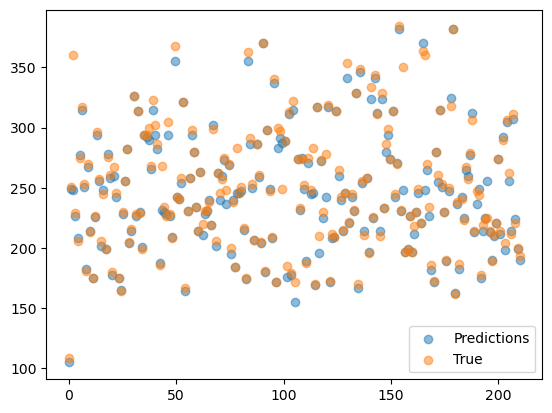

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(np.linspace(0, len(ypred), len(ypred)), ypred, alpha=0.5, label='Predictions')
plt.scatter(np.linspace(0, len(y_test), len(y_test)), y_test, alpha=0.5, label='True')
plt.legend()

# the accuracy score for decision tree clarifier model is 0.9760994263862333

### KNeighborsClassifier
### KNeighborsClassifier is a supervised machine learning algorithm used for classification tasks. It predicts the class labels of unseen data points based on the majority class of their k nearest neighbors in the feature space

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier (n_neighbors=3, metric='euclidean')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [37]:
ypred=knn.predict(x_test)
print(ypred)

[105 249 248 227 208 277 315 251 183 267 214 175 226 294 256 202 248 199
 278 258 178 260 242 175 165 228 256 282 204 214 326 227 314 230 201 294
 292 290 266 315 294 282 188 232 230 228 294 227 209 355 242 241 254 321
 164 231 258 294 280 234 214 263 211 228 231 240 219 302 202 262 240 260
 273 237 269 195 240 184 246 246 247 215 174 355 286 250 207 286 259 204
 370 180 298 249 208 337 172 283 291 287 289 176 311 178 315 155 274 232
 275 249 189 271 245 246 169 317 196 272 225 242 317 172 208 209 314 260
 240 214 246 341 221 242 231 329 167 346 254 214 258 197 324 225 341 312
 214 324 233 280 294 274 314 242 271 382 231 248 197 199 227 197 212 230
 246 221 370 248 265 227 182 172 280 255 315 251 230 189 247 325 382 163
 237 183 242 225 265 260 277 312 213 237 249 175 214 225 256 213 190 210
 221 274 212 292 198 305 256 214 307 224 199 190]


In [38]:
r2_score(y_test,ypred)

0.9139559627597277

# the accuracy score for KNeighborsClassifier  model is 0.9139559627597277

# conclusion:
## *  Among the models tested, the Decision Tree Regressor achieved the highest R2-score of 0.98, indicating a very high level of accuracy in predicting CO2 emissions based on the given features. The KNN algorithm also performed well, with an R2-score of 0.91, followed by the Linear Regression model with an R2-score of 0.84.